In [ ]:
import pandas as pd

In [ ]:
dt=pd.read_csv("bank-additional-full.csv",sep=";")

In [ ]:
dt.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
dt.isnull().sum().sum()

0

Here we can see that there is no missing value inside the any attributes of the Dataset.
However, if you have found the missing values then, you must to handle it. A very common method to fill the missing value is replace by mean.
So, if this data has missing value in the attribute of Age it will be fill by:
mean_age=dt['age'].mean()
dt['age']=dt['age'].fillna(value=mean_age)

In [ ]:
dt.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
dt.duplicated().sum() #Checking if there any duplicate value presents in dataset

12

In [ ]:
dt=dt.drop_duplicates() #Removing Duplicates

In [ ]:
dt.duplicated().sum()

0

In [ ]:
dt['job']=dt['job'].astype("category")
dt['marital']=dt['marital'].astype("category")
dt['education']=dt['education'].astype("category")
dt['default']=dt['default'].astype("category")
dt['housing']=dt['housing'].astype("category")
dt['loan']=dt['loan'].astype("category")
dt['contact']=dt['contact'].astype("category")
dt['month']=dt['month'].astype("category")
dt['day_of_week']=dt['day_of_week'].astype("category")
dt['poutcome']=dt['poutcome'].astype("category")
dt['y']=dt['y'].astype("category")

In [ ]:
dt.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

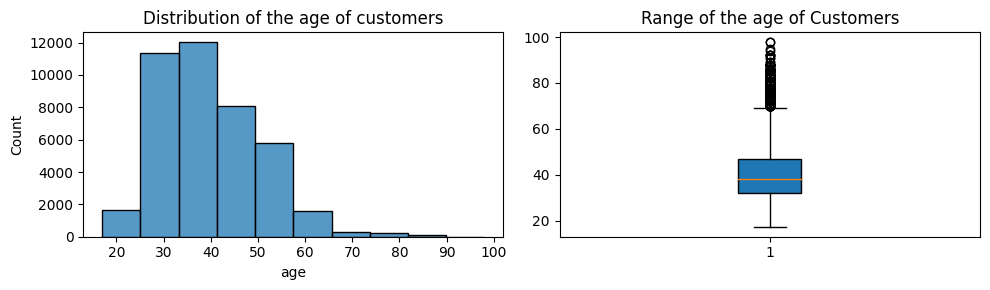

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).
sb.histplot(dt['age'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.
plt.boxplot(dt['age'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.
axes[0].set_title('Distribution of the age of customers')
axes[1].set_title('Range of the age of Customers')
plt.tight_layout()
plt.show()

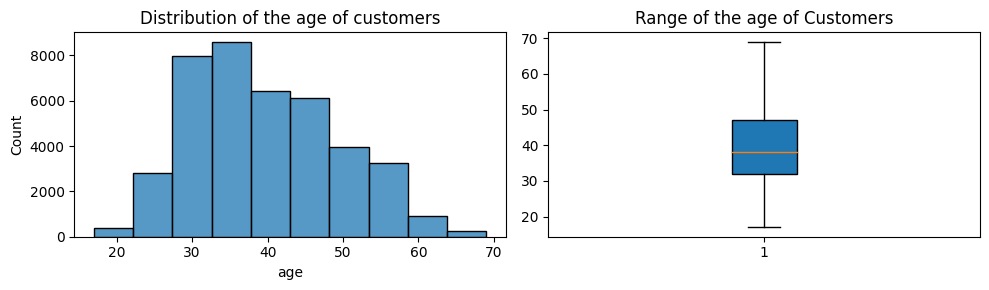

In [ ]:
Q1=dt['age'].quantile(0.25)

Q3=dt['age'].quantile(0.75)

IQR= Q3 - Q1

Upperbound_age = Q3 + 1.5*IQR


Index1=dt.loc[dt['age']>Upperbound_age,"age"].index
#Index1:: showing the index of outliers #loc::method using for data manipulation and analysis.

dt=dt.drop(Index1)

fig, axes = plt.subplots(1,2, figsize=(10,3))
sb.histplot(dt['age'],bins=10,ax=axes[0])
plt.boxplot(dt['age'],patch_artist = True)
axes[0].set_title('Distribution of the age of customers')
axes[1].set_title('Range of the age of Customers')
plt.tight_layout()
plt.show()



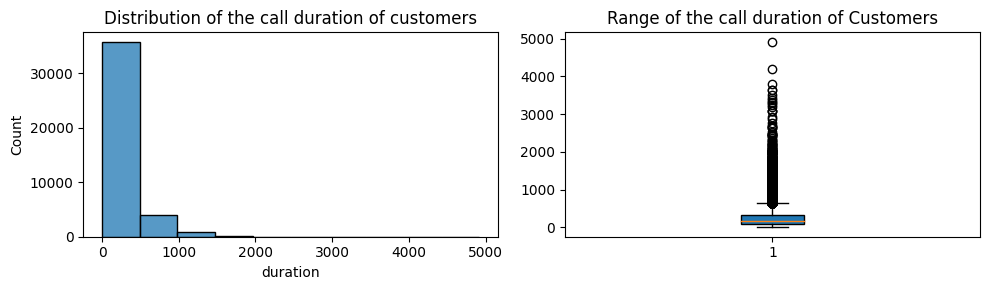

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).
sb.histplot(dt['duration'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.
plt.boxplot(dt['duration'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.
axes[0].set_title('Distribution of the call duration of customers')
axes[1].set_title('Range of the call duration of Customers')
plt.tight_layout()
plt.show()

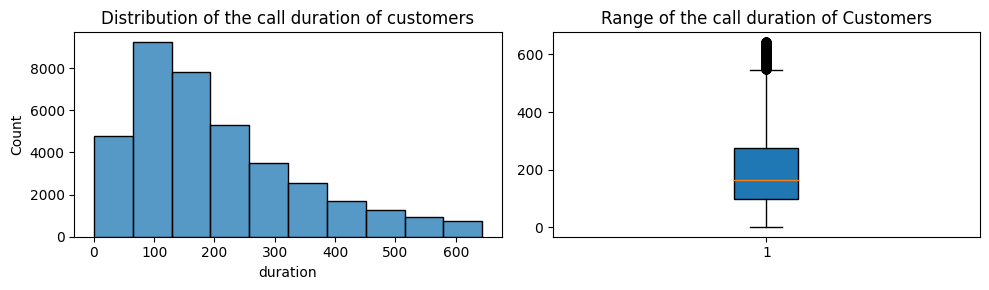

In [ ]:
Q1=dt['duration'].quantile(0.25)

Q3=dt['duration'].quantile(0.75)

IQR= Q3 - Q1

Upperbound_age = Q3 + 1.5*IQR


Index1=dt.loc[dt['duration']>Upperbound_age,"duration"].index
#Index1:: showing the index of outliers #loc::method using for data manipulation and analysis.

dt=dt.drop(Index1)

fig, axes = plt.subplots(1,2, figsize=(10,3))
sb.histplot(dt['duration'],bins=10,ax=axes[0])
plt.boxplot(dt['duration'],patch_artist = True)
axes[0].set_title('Distribution of the call duration of customers')
axes[1].set_title('Range of the call duration of Customers')
plt.tight_layout()
plt.show()



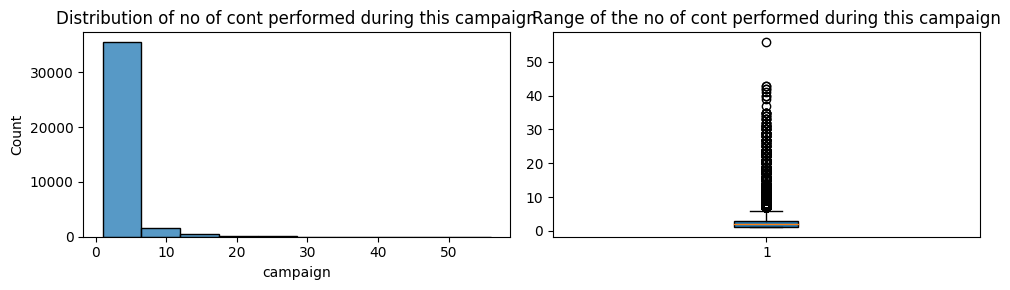

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).
sb.histplot(dt['campaign'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.
plt.boxplot(dt['campaign'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.
axes[0].set_title('Distribution of no of cont performed during this campaign')
axes[1].set_title('Range of the no of cont performed during this campaign')
plt.tight_layout()
plt.show()

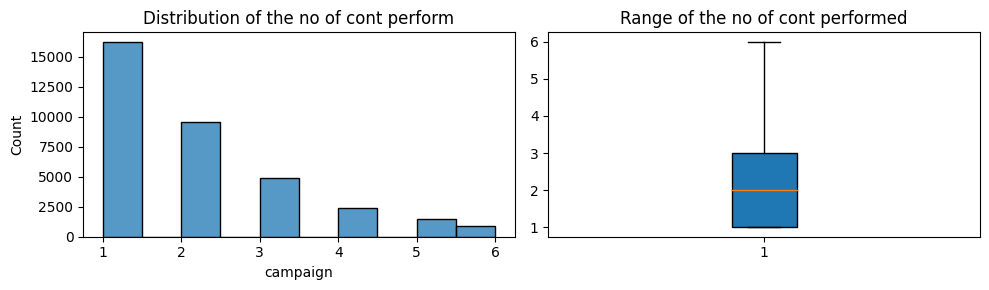

In [ ]:
Q1=dt['campaign'].quantile(0.25)

Q3=dt['campaign'].quantile(0.75)

IQR= Q3 - Q1

Upperbound_age = Q3 + 1.5*IQR


Index1=dt.loc[dt['campaign']>Upperbound_age,"duration"].index
#Index1:: showing the index of outliers #loc::method using for data manipulation and analysis.

dt=dt.drop(Index1)

fig, axes = plt.subplots(1,2, figsize=(10,3))
sb.histplot(dt['campaign'],bins=10,ax=axes[0])
plt.boxplot(dt['campaign'],patch_artist = True)
axes[0].set_title('Distribution of the no of cont perform')
axes[1].set_title('Range of the no of cont performed')
plt.tight_layout()
plt.show()



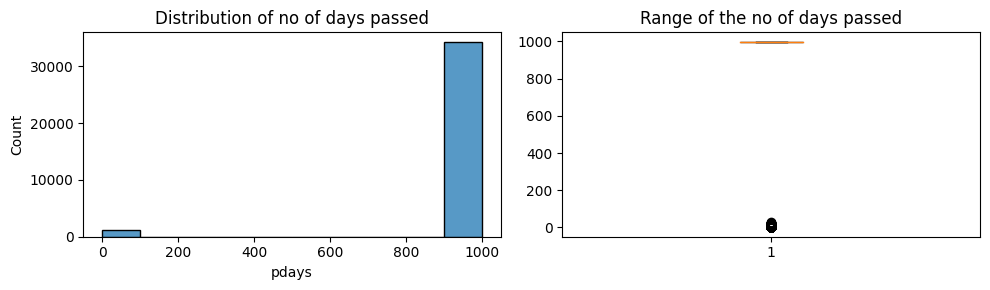

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).
sb.histplot(dt['pdays'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.
plt.boxplot(dt['pdays'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.
axes[0].set_title('Distribution of no of days passed')
axes[1].set_title('Range of the no of days passed')
plt.tight_layout()
plt.show()

Here, we can't remove the outliers as the most of the data far from the range. If you removed it most of the data get loss.

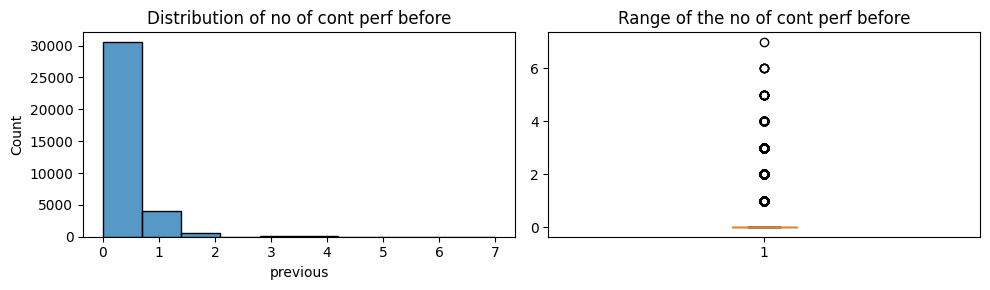

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).
sb.histplot(dt['previous'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.
plt.boxplot(dt['previous'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.
axes[0].set_title('Distribution of no of cont perf before')
axes[1].set_title('Range of the no of cont perf before')
plt.tight_layout()
plt.show()

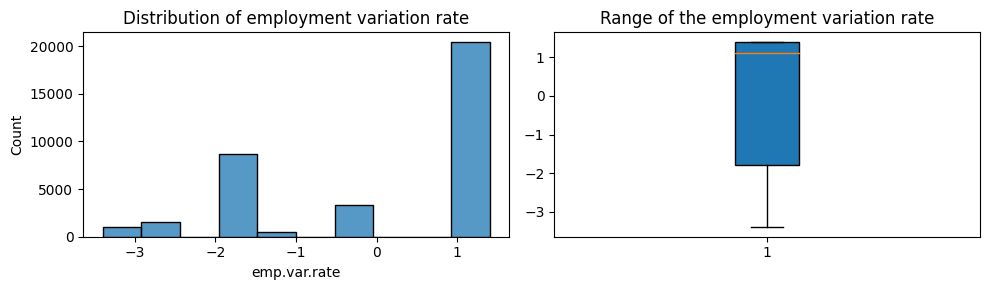

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).
sb.histplot(dt['emp.var.rate'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.
plt.boxplot(dt['emp.var.rate'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.
axes[0].set_title('Distribution of employment variation rate')
axes[1].set_title('Range of the employment variation rate')
plt.tight_layout()
plt.show()

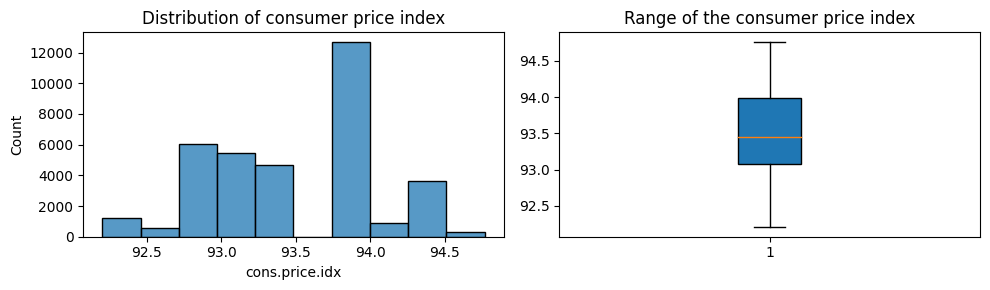

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).
sb.histplot(dt['cons.price.idx'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.
plt.boxplot(dt['cons.price.idx'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.
axes[0].set_title('Distribution of consumer price index')
axes[1].set_title('Range of the consumer price index')
plt.tight_layout()
plt.show()

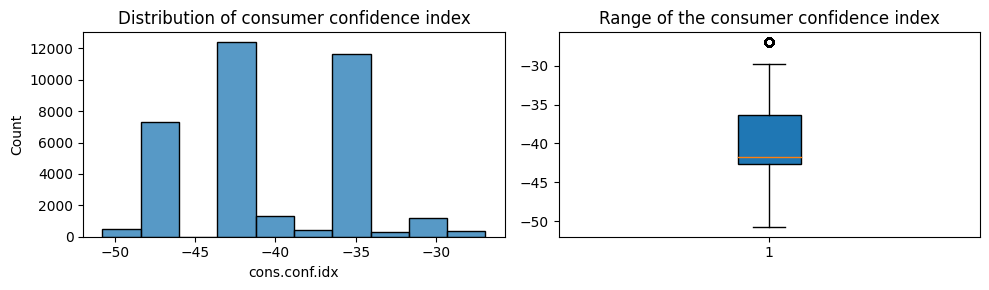

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).
sb.histplot(dt['cons.conf.idx'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.
plt.boxplot(dt['cons.conf.idx'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.
axes[0].set_title('Distribution of consumer confidence index')
axes[1].set_title('Range of the consumer confidence index')
plt.tight_layout()
plt.show()

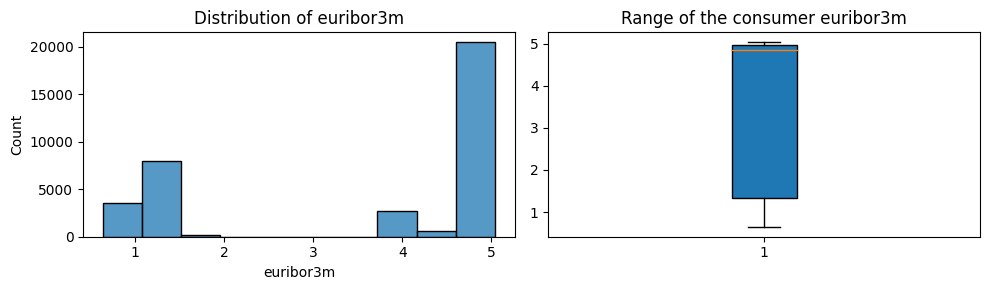

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).
sb.histplot(dt['euribor3m'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.
plt.boxplot(dt['euribor3m'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.
axes[0].set_title('Distribution of euribor3m')
axes[1].set_title('Range of the consumer euribor3m')
plt.tight_layout()
plt.show()

In [ ]:
j=dt['job'].unique()

In [ ]:
j

['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']

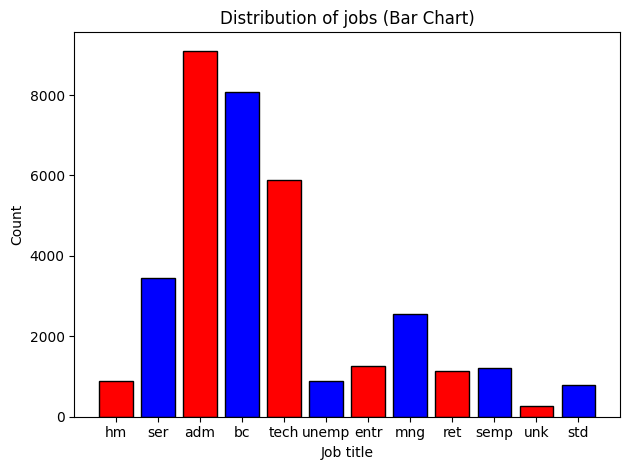

In [ ]:
job1 = dt.loc[dt['job'] == 'housemaid', ].shape[0] # .loc method is used to filter the DataFrame based on the condition
job2 = dt.loc[dt['job'] == 'services', ].shape[0] #shape[0] is used to get the number of rows that meet the condition.
job3 = dt.loc[dt['job'] == 'admin.', ].shape[0]
job4 = dt.loc[dt['job'] == 'blue-collar', ].shape[0]
job5 = dt.loc[dt['job'] == 'technician', ].shape[0]
job6 = dt.loc[dt['job'] == 'unemployed', ].shape[0]
job7 = dt.loc[dt['job'] == 'entrepreneur', ].shape[0]
job8 = dt.loc[dt['job'] == 'management', ].shape[0]
job9 = dt.loc[dt['job'] == 'retired', ].shape[0]
job10 = dt.loc[dt['job'] == 'self-employed', ].shape[0]
job11 = dt.loc[dt['job'] == 'unknown', ].shape[0]
job12= dt.loc[dt['job'] == 'student', ].shape[0]

slice = [job1,job2,job3,job4,job5,job6,job7,job8,job9,job10,job11,job12]
labels = ["hm", "ser","adm","bc","tech","unemp","entr","mng","ret","semp","unk","std"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Job title')
plt.ylabel('Count')
plt.title('Distribution of jobs (Bar Chart)')

plt.tight_layout()
plt.show()


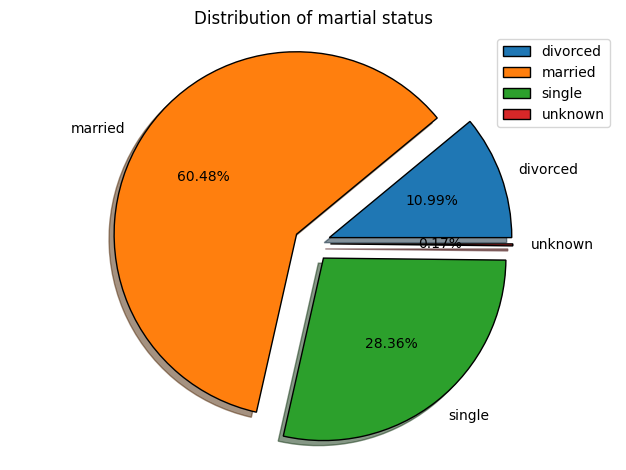

In [ ]:
m1= dt.loc[dt['marital'] == 'divorced', ].shape[0]
m2= dt.loc[dt['marital'] == 'married', ].shape[0]
m3= dt.loc[dt['marital'] == 'single', ].shape[0]
m4= dt.loc[dt['marital'] == 'unknown', ].shape[0]

slice = [m1,m2,m3,m4]
labels = ["divorced", "married","single","unknown"]
explode = [0.1, 0.1,0.1,0.1] #explode list specifies how much each wedge of the pie should be separated from the center.

plt.pie(slice, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, wedgeprops={'edgecolor': 'black'}, startangle=360) #autopct='%1.2f%%' parameter displays the percentage of each slice on the pie.
plt.axis('equal') #plt.axis('equal'): This ensures that the pie chart is drawn as a circle (equal aspect ratio).
plt.title("Distribution of martial status")
plt.legend()
plt.tight_layout()
plt.show()



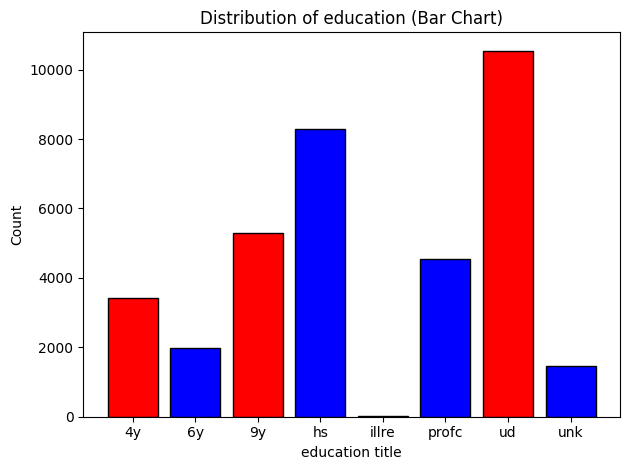

In [ ]:
e1 = dt.loc[dt['education'] == 'basic.4y', ].shape[0] # .loc method is used to filter the DataFrame based on the condition
e2 = dt.loc[dt['education'] == 'basic.6y', ].shape[0] #shape[0] is used to get the number of rows that meet the condition.
e3 = dt.loc[dt['education'] == 'basic.9y', ].shape[0]
e4 = dt.loc[dt['education'] == 'high.school', ].shape[0]
e5 = dt.loc[dt['education'] == 'illiterate', ].shape[0]
e6 = dt.loc[dt['education'] == 'professional.course', ].shape[0]
e7 = dt.loc[dt['education'] == 'university.degree', ].shape[0]
e8 = dt.loc[dt['education'] == 'unknown', ].shape[0]


slice = [e1,e2,e3,e4,e5,e6,e7,e8]
labels = ["4y", "6y","9y","hs","illre","profc","ud","unk"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('education title')
plt.ylabel('Count')
plt.title('Distribution of education (Bar Chart)')

plt.tight_layout()
plt.show()


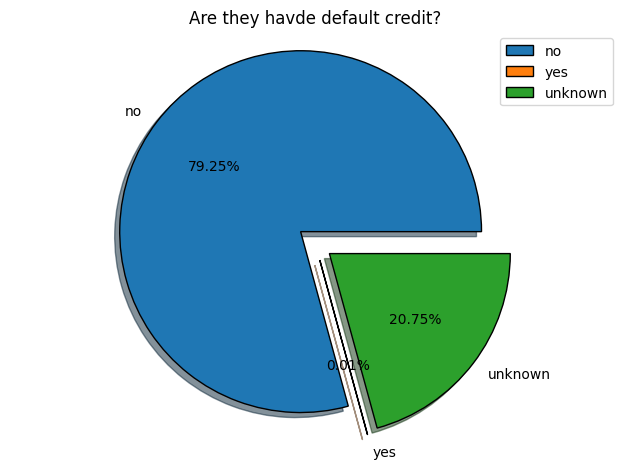

In [ ]:
d1= dt.loc[dt['default'] == 'no', ].shape[0]
d2= dt.loc[dt['default'] == 'yes', ].shape[0]
d3= dt.loc[dt['default'] == 'unknown', ].shape[0]


slice = [d1,d2,d3]
labels = ["no", "yes","unknown"]
explode = [0.1, 0.1,0.1] #explode list specifies how much each wedge of the pie should be separated from the center.

plt.pie(slice, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, wedgeprops={'edgecolor': 'black'}, startangle=360) #autopct='%1.2f%%' parameter displays the percentage of each slice on the pie.
plt.axis('equal') #plt.axis('equal'): This ensures that the pie chart is drawn as a circle (equal aspect ratio).
plt.title("Are they havde default credit?")
plt.legend()
plt.tight_layout()
plt.show()



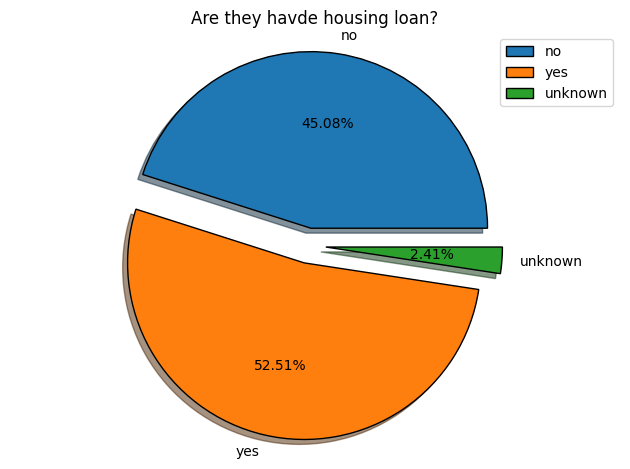

In [ ]:
h1= dt.loc[dt['housing'] == 'no', ].shape[0]
h2= dt.loc[dt['housing'] == 'yes', ].shape[0]
h3= dt.loc[dt['housing'] == 'unknown', ].shape[0]


slice = [h1,h2,h3]
labels = ["no", "yes","unknown"]
explode = [0.1, 0.1,0.1] #explode list specifies how much each wedge of the pie should be separated from the center.

plt.pie(slice, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, wedgeprops={'edgecolor': 'black'}, startangle=360) #autopct='%1.2f%%' parameter displays the percentage of each slice on the pie.
plt.axis('equal') #plt.axis('equal'): This ensures that the pie chart is drawn as a circle (equal aspect ratio).
plt.title("Are they havde housing loan?")
plt.legend()
plt.tight_layout()
plt.show()



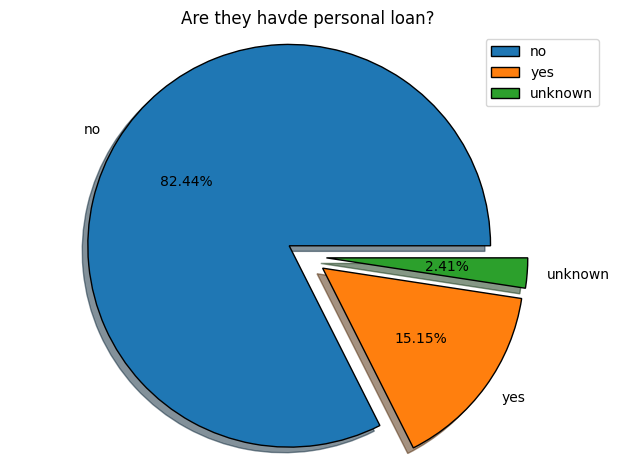

In [ ]:
l1= dt.loc[dt['loan'] == 'no', ].shape[0]
l2= dt.loc[dt['loan'] == 'yes', ].shape[0]
l3= dt.loc[dt['loan'] == 'unknown', ].shape[0]


slice = [l1,l2,l3]
labels = ["no", "yes","unknown"]
explode = [0.1, 0.1,0.1] #explode list specifies how much each wedge of the pie should be separated from the center.

plt.pie(slice, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, wedgeprops={'edgecolor': 'black'}, startangle=360) #autopct='%1.2f%%' parameter displays the percentage of each slice on the pie.
plt.axis('equal') #plt.axis('equal'): This ensures that the pie chart is drawn as a circle (equal aspect ratio).
plt.title("Are they havde personal loan?")
plt.legend()
plt.tight_layout()
plt.show()



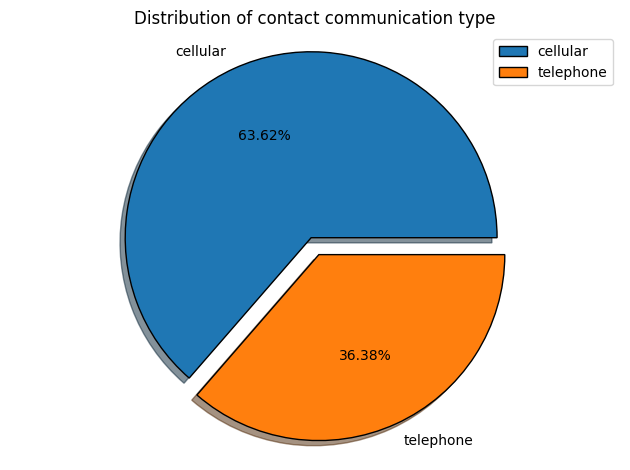

In [ ]:
cc1= dt.loc[dt['contact'] == 'cellular', ].shape[0]
cc2= dt.loc[dt['contact'] == 'telephone', ].shape[0]



slice = [cc1,cc2]
labels = ["cellular", "telephone"]
explode = [0.1, 0] #explode list specifies how much each wedge of the pie should be separated from the center.

plt.pie(slice, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, wedgeprops={'edgecolor': 'black'}, startangle=360) #autopct='%1.2f%%' parameter displays the percentage of each slice on the pie.
plt.axis('equal') #plt.axis('equal'): This ensures that the pie chart is drawn as a circle (equal aspect ratio).
plt.title("Distribution of contact communication type")
plt.legend()
plt.tight_layout()
plt.show()



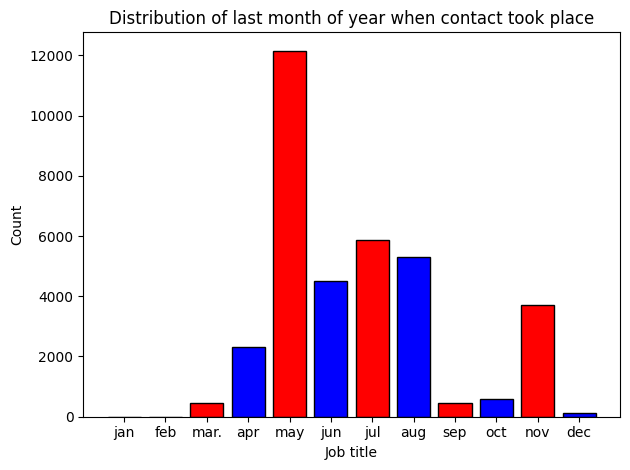

In [ ]:
my1 = dt.loc[dt['month'] == 'jan', ].shape[0] # .loc method is used to filter the DataFrame based on the condition
my2 = dt.loc[dt['month'] == 'feb', ].shape[0] #shape[0] is used to get the number of rows that meet the condition.
my3 = dt.loc[dt['month'] == 'mar', ].shape[0]
my4 = dt.loc[dt['month'] == 'apr', ].shape[0]
my5 = dt.loc[dt['month'] == 'may', ].shape[0]
my6 = dt.loc[dt['month'] == 'jun', ].shape[0]
my7 = dt.loc[dt['month'] == 'jul', ].shape[0]
my8 = dt.loc[dt['month'] == 'aug', ].shape[0]
my9 = dt.loc[dt['month'] == 'sep', ].shape[0]
my10 = dt.loc[dt['month'] == 'oct', ].shape[0]
my11 = dt.loc[dt['month'] == 'nov', ].shape[0]
my12= dt.loc[dt['month'] == 'dec', ].shape[0]

slice = [my1,my2,my3,my4,my5,my6,my7,my8,my9,my10,my11,my12]
labels = ["jan", "feb","mar.","apr","may","jun","jul","aug","sep","oct","nov","dec"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Job title')
plt.ylabel('Count')
plt.title('Distribution of last month of year when contact took place')

plt.tight_layout()
plt.show()


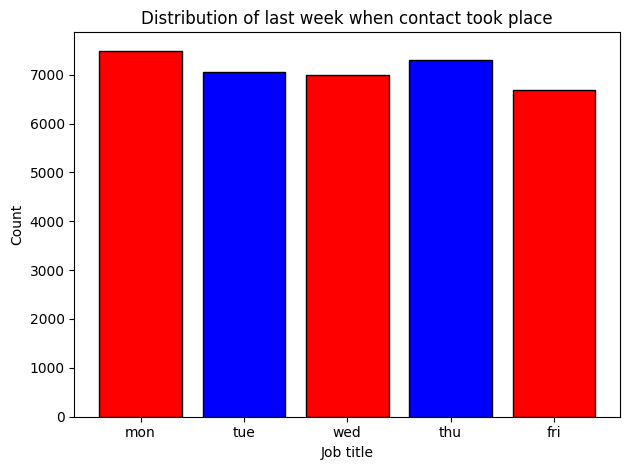

In [ ]:
cd1 = dt.loc[dt['day_of_week'] == 'mon', ].shape[0] # .loc method is used to filter the DataFrame based on the condition
cd2 = dt.loc[dt['day_of_week'] == 'tue', ].shape[0] #shape[0] is used to get the number of rows that meet the condition.
cd3 = dt.loc[dt['day_of_week'] == 'wed', ].shape[0]
cd4 = dt.loc[dt['day_of_week'] == 'thu', ].shape[0]
cd5 = dt.loc[dt['day_of_week'] == 'fri', ].shape[0]


slice = [cd1,cd2,cd3,cd4,cd5]
labels = ["mon", "tue","wed","thu","fri"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Job title')
plt.ylabel('Count')
plt.title('Distribution of last week when contact took place')

plt.tight_layout()
plt.show()


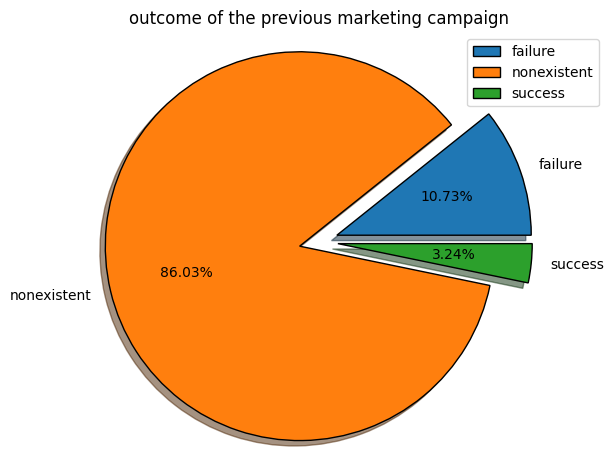

In [ ]:
p1= dt.loc[dt['poutcome'] == 'failure', ].shape[0]
p2= dt.loc[dt['poutcome'] == 'nonexistent', ].shape[0]
p3= dt.loc[dt['poutcome'] == 'success', ].shape[0]


slice = [p1,p2,p3]
labels = ["failure", "nonexistent","success"]
explode = [0.1, 0.1,0.1] #explode list specifies how much each wedge of the pie should be separated from the center.

plt.pie(slice, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, wedgeprops={'edgecolor': 'black'}, startangle=360) #autopct='%1.2f%%' parameter displays the percentage of each slice on the pie.
plt.axis('equal') #plt.axis('equal'): This ensures that the pie chart is drawn as a circle (equal aspect ratio).
plt.title("outcome of the previous marketing campaign")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
ss=round(dt.describe().T,0) #To get descriptive statistics of numeric data in dataset

In [ ]:
ss

,count,mean,std,min,25%,50%,75%,max
age,35524.0,40.0,10.0,17.0,32.0,38.0,47.0,69.0
duration,35524.0,207.0,140.0,0.0,101.0,170.0,281.0,644.0
campaign,35524.0,2.0,1.0,1.0,1.0,2.0,3.0,6.0
pdays,35524.0,964.0,184.0,0.0,999.0,999.0,999.0,999.0
previous,35524.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
emp.var.rate,35524.0,0.0,2.0,-3.0,-2.0,1.0,1.0,1.0
cons.price.idx,35524.0,94.0,1.0,92.0,93.0,93.0,94.0,95.0
cons.conf.idx,35524.0,-41.0,5.0,-51.0,-43.0,-42.0,-36.0,-27.0
euribor3m,35524.0,4.0,2.0,1.0,1.0,5.0,5.0,5.0
nr.employed,35524.0,5167.0,71.0,4964.0,5099.0,5191.0,5228.0,5228.0


In [ ]:
ss=ss.drop("count",axis=1)

In [ ]:
ss

,mean,std,min,25%,50%,75%,max
age,40.0,10.0,17.0,32.0,38.0,47.0,69.0
duration,207.0,140.0,0.0,101.0,170.0,281.0,644.0
campaign,2.0,1.0,1.0,1.0,2.0,3.0,6.0
pdays,964.0,184.0,0.0,999.0,999.0,999.0,999.0
previous,0.0,0.0,0.0,0.0,0.0,0.0,7.0
emp.var.rate,0.0,2.0,-3.0,-2.0,1.0,1.0,1.0
cons.price.idx,94.0,1.0,92.0,93.0,93.0,94.0,95.0
cons.conf.idx,-41.0,5.0,-51.0,-43.0,-42.0,-36.0,-27.0
euribor3m,4.0,2.0,1.0,1.0,5.0,5.0,5.0
nr.employed,5167.0,71.0,4964.0,5099.0,5191.0,5228.0,5228.0


In [ ]:
ss.to_csv("ss.csv")

In [ ]:
co_matrix=round(dt.corr(),2) #Making correlation matrix to show the relationship between variables.

<ipython-input-39-ec843c3f9f8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co_matrix=round(dt.corr(),2) #Making correlation matrix to show the relationship between two variables.


In [ ]:
print(co_matrix)

                 age  duration  campaign  pdays  previous  emp.var.rate  \
age             1.00      0.00      0.01   0.00     -0.02          0.07   
duration        0.00      1.00     -0.06  -0.07      0.05         -0.05   
campaign        0.01     -0.06      1.00   0.04     -0.06          0.10   
pdays           0.00     -0.07      0.04   1.00     -0.57          0.27   
previous       -0.02      0.05     -0.06  -0.57      1.00         -0.42   
emp.var.rate    0.07     -0.05      0.10   0.27     -0.42          1.00   
cons.price.idx  0.04     -0.00      0.07   0.08     -0.21          0.78   
cons.conf.idx   0.10      0.00     -0.02  -0.09     -0.06          0.22   
euribor3m       0.08     -0.06      0.08   0.29     -0.45          0.97   
nr.employed     0.07     -0.08      0.09   0.37     -0.50          0.91   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                       0.04           0.10       0.08         0.07  
duration                 -0.00

<Axes: >

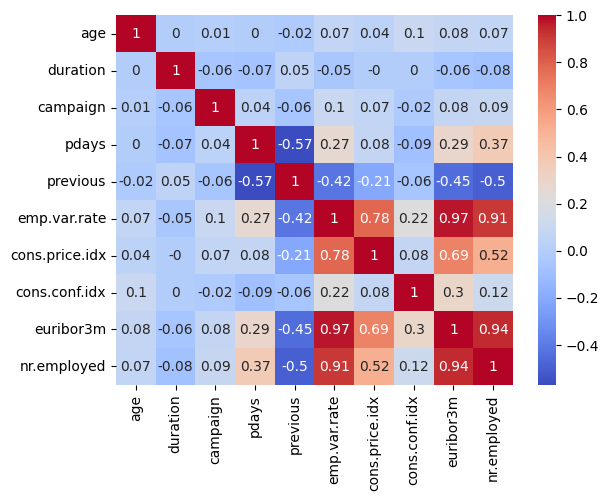

In [ ]:
sb.heatmap(co_matrix, annot=True, cmap="coolwarm") # Making heatmap to visualise correlation matrix in better way. Here Annot:: used to print value , coolwarm::need to show color range

Our target varible is y which represents has the client subscribed a term deposit?('yes','no'). Thus, we divide our dataset into input and target dataset.



In [ ]:
dfx=dt.drop("y",axis=1) #Input Dataset

In [ ]:
dfy=dt['y'] #Target Dataset

In [ ]:
dfx.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
dfy.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: category
Categories (2, object): ['no', 'yes']

In [ ]:
dfx.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
dtype: object

To perform the normalization on data we should have numeric data. Hence, we need to convert our all input category data in numeric. Here, we are going to use Label encoding method as we have ordinal category data.  

In [ ]:
dfx['job']=dfx['job'].cat.codes

In [ ]:
dfx['job'].unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8], dtype=int8)

In [ ]:

dfx['loan']=dfx['loan'].cat.codes
dfx['contact']=dfx['contact'].cat.codes
dfx['month']=dfx['month'].cat.codes
dfx['day_of_week']=dfx['day_of_week'].cat.codes
dfx['poutcome']=dfx['poutcome'].cat.codes
dfx['marital']=dfx['marital'].cat.codes
dfx['education']=dfx['education'].cat.codes
dfx['default']=dfx['default'].cat.codes
dfx['housing']=dfx['housing'].cat.codes



In [ ]:
dfx.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

Performing min max scaller to normalize data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler()

In [ ]:
scale_dfx=pd.DataFrame(scaler.fit_transform(dfx),columns=dfx.columns)

In [ ]:
scale_dfx.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.750000,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.405280,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.769231,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.231366,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.384615,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.350932,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735


Spilt the data set into train and test dataset.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(scale_dfx,dfy,test_size=0.2,random_state=3)

In [ ]:
y_train.value_counts() #Calculating values of target variable.

no     26095
yes     2324
Name: y, dtype: int64

Now, we need to balance our target variable, so here we are going to use over smappling method in which we are going to use SMOTE technique.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
S=SMOTE()

In [ ]:
sx_train,sy_train=S.fit_resample(x_train,y_train)

In [ ]:
sy_train.value_counts()

no     26095
yes    26095
Name: y, dtype: int64

In [ ]:
x_train.to_csv("x_train.csv")

In [ ]:
x_test.to_csv("x_test.csv")
sy_train.to_csv("sy_train.csv")
y_test.to_csv("y_test.csv")
sx_train.to_csv("sx_train.csv")

Implimenting KNN classifier.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN=KNeighborsClassifier()

In [ ]:
KNN.fit(sx_train,sy_train)

KNeighborsClassifier()

In [ ]:
pred=KNN.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
knn_acc=round(accuracy_score(pred,y_test)*100,2)

In [ ]:
knn_acc

87.01

In [ ]:
cf_matrix=confusion_matrix(y_test,pred)

In [ ]:
cf_matrix

array([[5778,  778],
       [ 145,  404]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


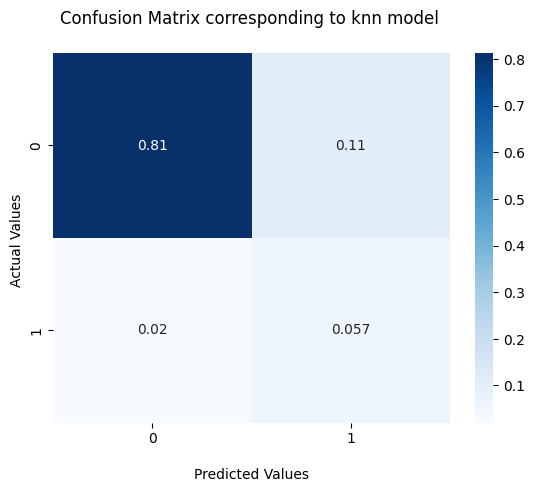

In [ ]:

ax = sb.heatmap(((cf_matrix)/np.sum(cf_matrix)), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix corresponding to knn model \n')

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order

ax.xaxis.set_ticklabels(['0','1'])

ax.yaxis.set_ticklabels(['0','1'])

plt.show()